# Simplified APOGEE-DR14 selection function (disk fields) 

Here is a simplified (and approximate) but 'ready to use' model for APOGEE selection function, presented as a fits table file that tells for any APOGEE disk field, magnitude and color range, what the probability that a star is selected is (described in sect. A.1-2) derived for only a set of specific fields in APOGEE-1 and APOGEE-2. This is free to use and examples are below. 

If used for publication, please cite (the inside-out paper) for the data file and Rix & Bovy (2013) and Bovy+14 for the method.

Please report any issue encountered with this file, constructive feedback is welcome.



## A. Selection function: quick description of method

### 0. Selection function is necessary
- to do density modelling
- to assess selection effects when working with spatial-dependent, or color-dependent, or magnitude-dependent quantities

### 1. Selection fractions


The details of APOGEE-1 selection function are described in [Zasowski et al. (2013)](https://arxiv.org/pdf/1308.0351.pdf) (and APOGEE-2 [Zasowski et al. 2017](https://arxiv.org/pdf/1708.00155.pdf)). The general method is laid-out in [Rix & Bovy (2013)](https://arxiv.org/pdf/1301.3168.pdf) and [Bovy (2014)](https://arxiv.org/pdf/1405.1032.pdf). To most stars of the the APOGEE sample, we can associate a probability that this star was observed given its location, magnitude and color (selection function), to combine with a probability for this star to be at this location (density model). In most APOGEE disk fields, stars were selected according to simple magnitude cuts in H band and cuts in dereddened (J-K)$_0$ color from the photometric sample 2MASS. When too many stars in a pointing can satisfy these criteria, the subset of stars to observe was drawn roughly randomly. This subset contains a fraction of all stars available


$$
    S_\mathrm{i} = \frac{\mathrm{\#\star ~in ~APOGEE ~field ~i}}{\mathrm{\# \star ~in ~2MASS ~matching ~selec ~criteria ~in ~i}}.
$$


The selection criteria are slightly more complex (some quality requirements listed in Zasowski 2013)


We focus on the main fields of APOGEE that are not dominated by ancillary programs (this equation is approximately valid only for targets drawn randomly from 2MASS, not for targets chosen for a specific purpose). 


I've also removed the other fields for which the selection criteria were complex to model (e.g., most halo fields that had crazy color and magnitude cuts, and all fields with $|b| > 30$ deg, as well as fields shared with the survey MARVELS). 


### 2. Dust extinction: Fractional area where standard candle can be seen


In addition, a fraction of stars in each field in the Milky Way disk is too extincted by interstellar dust to be detectable within the magnitude limits of APOGEE (see Bovy & Rix 2016). This is a function of distance, and can be modelled, if we have a model for the extinction spatial distribution in H band. We used the Bayestar19 3D extinction map (Green+19), which predicts extinction distribution in different bands at any $(l, b, D)$. We convert these values to H band, assuming the extinction law of Indebetouw(2005) ($A_H/A_K=1.55$). 

In the particular case of the red clump stars, standard candles of magnitude $H_\mathrm{RC} = -1.49$, the fraction of stars that can be seen at a given distance D within APOGEE magnitude limits $H_\mathrm{min}$ and $H_\mathrm{max}$ is the fractional area of the field at this given distance that is not hidden by dust extinction $A_H$.

$$
    f_i(D ~|~ \mathrm{field ~i}) = \frac{\mathrm{Area}( H_\mathrm{min} < H(D, H_\mathrm{RC}, A_H) < H_\mathrm{max} )}{\mathrm{Area ~ field~i }}.
$$


The dust map is made out of pixels and uses healpix coordinates etc, that one has to query (it is well explained on the Bayestar website).

The map's highest resolution (3.4') allows to compute this ratio by counting the distance-dependent fraction of pixels that satisfy the inequality


\begin{equation}
    f_i(D ~|~ \mathrm{field ~i}) = \frac{\mathrm{\# ~ pix}( H_\mathrm{min} < H(D, H_\mathrm{RC}, A_H) < H_\mathrm{max} )}{\mathrm{\# ~pix ~in ~ field~i }}.
\end{equation}


We can finally recast this into the overall selection function,

\begin{equation}\label{eq:selection_function_dust}
    S(l_i, b_i, D) = S_i \times f_i(D  ~|~ \mathrm{field ~i}).
\end{equation}

In practice, this exercise can be done for any standard canlde (and we did it for a several values of H band magnitudes, listed in the selection function file below). However, as stars get brighter and can be seen at larger distances, the uncertainties of the extinction map grow, making the selection function inaccurate.


## B. Description of the selection function file

This table is a list of the fields I (more or less) trust. For each of these fields, there is:
- the LOCATION_ID = unique identifier of that field (also in all APOGEE data products). Two fields that overlap exactly in APOGEE-1 and APOGEE-2 may have the same name, but will have a different location id
- GLON, GLATthe Galactic coordinates in degrees
- RAD the radius of the field in degrees
- SEL_FRAC the selection fraction, that corresponds to $S_i$ in the equations above
- DIST, a 3D array of distances 'DISTANCE' in kpc, for the distance dependent term due to 3D extinction for different absolute magnitude standard candles. Shape is (N_row x N_distances x N_magnitudes)
- FRAC_DUST an array of fractions of stars that can bee seen  as a function of distance in single fields (less than 1 means extincted behind dust), same shape as distances, that corresponds to $f_i(D ~|~ \mathrm{field~i})$ in the equations above
- These fractions were computed on an absolute magnitude grid as np.linspace(-7, -1, 40)
- COHORT (s for short, m for medium, l for long) that correspond to the three magnitude bins
- COLBIN (for apogee 2)
- H_MIN, H_MAX the magnitude limits for the selection into that row
- JK_MIN, JK_MAX the color limits for the selection into that row (if not documented, it is apogee1: 0.5)
- SURVEY either 'apogee' or 'apogee2' to know which survey the field belongs to


### How to load it:
- just download the selection function file and open it with whatever table reader (e.g., below)

In [1]:
# useful packages
from astropy.table import Table, unique, join
import matplotlib.pyplot as plt
import numpy as np

# reading the selection function table
sf = Table.read('sf_apogee_dr14_disk.fits')
sf.columns

<TableColumns names=('LOCATION_ID','GLON','GLAT','RADIUS','SEL_FRAC','H_MIN','H_MAX','JK_MIN','COHORT','COLBIN','JK_MAX','SURVEY','DIST','FRAC_DUST')>

In [2]:
# set plotting parameters for later
plt.rcParams["figure.figsize"] = [12, 9]
plt.rcParams["font.size"] = 20

#### Fields and slection fractions in the sky for APOGEE-1 and APOGEE-2 short cohorts

The following plot shows the selection fractions inferred in each field. The circles are for APOGEE-1 and triangles for APOGEE-2.

As expected, we need to select a higher fraction of stars when we look at large latitudes (fewer stars away from the plane), and we need to select a smaller fraction of stars when looking towards the inner disk (there are so many stars). Since APOGEE-2 has multiple magnitude and color bins that overlap, here take the short cohorts and the blue bin.

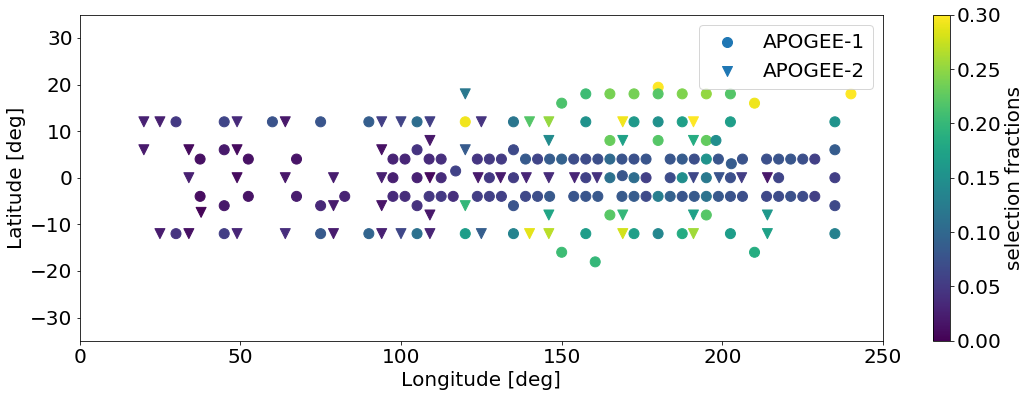

In [3]:
# Plotting the selection frations for the short cohort and blue bins only

# mask short and blue
m_short = (sf['H_MIN'] < 12) & (sf['SEL_FRAC'] > 0)
m_blue = sf['JK_MIN'] < 0.6
m_ap2  = sf['SURVEY'] =='apogee2'
m_ap1 = sf['SURVEY'] == 'apogee'

plt.figure(figsize=(18,6))

# APOGEE -1 fields and selection fractions
plt.scatter(sf['GLON'][m_short & m_blue & m_ap1], sf['GLAT'][m_short & m_blue & m_ap1], s=100, 
            c=sf['SEL_FRAC'][m_short & m_blue & m_ap1], vmin=0, vmax=0.3, label='APOGEE-1')

# APOGEE-2 fields and selection fractions
plt.scatter(sf['GLON'][m_short & m_blue & m_ap2], sf['GLAT'][m_short & m_blue & m_ap2], s=100, 
            c=sf['SEL_FRAC'][m_short & m_blue & m_ap2], vmin=0, vmax=0.3, marker='v', label='APOGEE-2')

plt.ylim(-35,35)
plt.xlim(0, 250)
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.colorbar(label='selection fractions')
plt.legend()

#### Where the dust comes in ('effective selection function'): Case of a standard candle

Some stars of a given absolute magnitude won't be seeb in a field due to some extinction. The fraction  of such stars that is lost, as a function of distance, is plotted below. If the sample does not contain just standard candles, one needs to model the distribution of absolute magnitudes and marginalize this over $p(M_H)$.

As a general trend, the maximum distance at which we can see a star decreases with Galatic latitude because the midplane is more extincted (but this is not true everywhere).


Text(0.5, 1.0, 'Fractional area where an arbitrary standard candle is visible')

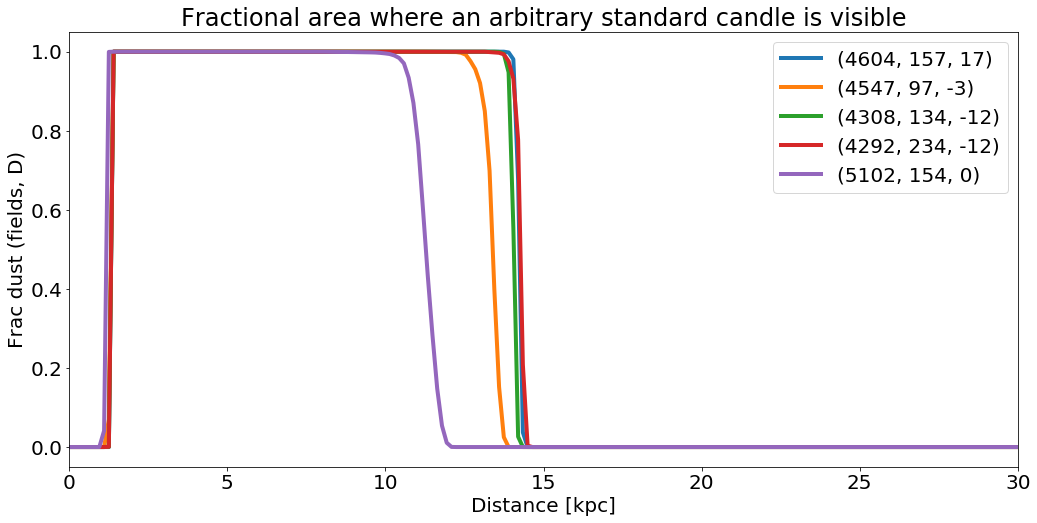

In [4]:
plt.figure(figsize=(17,8))
Nfields = 5
rand_fields = np.random.randint(0, len(sf), Nfields)
for i in range(Nfields):
    plt.plot(sf['DIST'][rand_fields[i],:,22], sf['FRAC_DUST'][rand_fields[i],:,22], 
            label=(sf['LOCATION_ID'][rand_fields[i]], int(sf['GLON'][rand_fields[i]]),int(sf['GLAT'][rand_fields[i]])), 
             lw=4)
plt.xlim(0,30)
plt.legend()
plt.xlabel('Distance [kpc]')
plt.ylabel('Frac dust (fields, D)')
plt.title('Fractional area where an arbitrary standard candle is visible')

## C. Loading the dataset and bringing it down to the modelled selection function

The observed dataset contains more stars than we can model: some stars were selected for specific purpose (calibrators, tellurics, cluster members etc.). For these stars, which are not selected as part of the 'main' (random) sample, I don't know how to work out a selection probability. Also, I have deliberately removed some fields from considerations because I deemed that I did not recover the selection probability corretly. In particular, excluded halo and bulge fields, fields that were shared with MARVELS (which has different selection criteria in color and in velocity). So we need to exclude the stars that lie in these fields from the dataset.

The example below uses the APOGEE-DR14 red clump catalog (Bovy+14) that can be downloaded [there](https://data.sdss.org/sas/dr14//apogee/vac/apogee-rc/cat/)

A few bitmasks help do that:
- stars part of the short cohort have APOGEE_TARGET1 bit 11 set or APOGEE2_TARGET1 respectively in APOGEE-1 and APOGEE-2
- same for medium and long cohorts with the bits 12 and 13
- for APOGEE-2, stars that were selected in single color bin $(J-K)_0 > 0.5$ have APOGEE2_TARGET1 bit 0 set
- same for the dual color selection: red and blue bins with bits 1 and 2 respectively


In [5]:
# Load some table data
# download APOGEE-RC DR14 from the value added catalog (Bovy+14):
# https://data.sdss.org/sas/dr14//apogee/vac/apogee-rc/cat/
tt = Table.read('../data/apogee-rc-DR14.fits')

### Keep only the 'Main Survey' stars 

In the example below, we will only keep the short cohort stars (so the brighter stars that did not need to be observed for too long). To keep all the cohrts, add to the boolean the same as the 11 bit, but with 12 and 13 for medium and long

In [6]:
# keep only the main survey stars in the short cohort
m_short1 = (tt['APOGEE_TARGET1'] & 2**11 !=0)      # short cohort for APOGEE1
m_short2 = (tt['APOGEE2_TARGET1'] & 2**11 !=0)     # short cohort for APOGEE2

# keep only the blue, red and single color bin stars (in APOGEE2)                                               
m_color = ((tt['APOGEE2_TARGET1'] & 2**0 !=0) + (tt['APOGEE2_TARGET1'] & 2**1 !=0) +(tt['APOGEE2_TARGET1'] & 2**2 !=0))

### Keep only the stars in the fields that have a model (in the selection function file)

We can use the location id column to crossmatch stars with the location id of the fields that we can model.

In [7]:
# Get the location ids of the selection function
locids = np.unique(sf['LOCATION_ID'])

# create a mask and loop over the location ids list
m_locids = np.zeros(len(tt), dtype='bool')
for i in range(len(locids)):
    m_locids += locids[i] == tt['LOCATION_ID']

### Apply the cuts and check

We can now apply these cuts and veryfy that spatially, and in H plane, stars are at the expected places

We keep 12109  stars out of  29502


(0, 250)

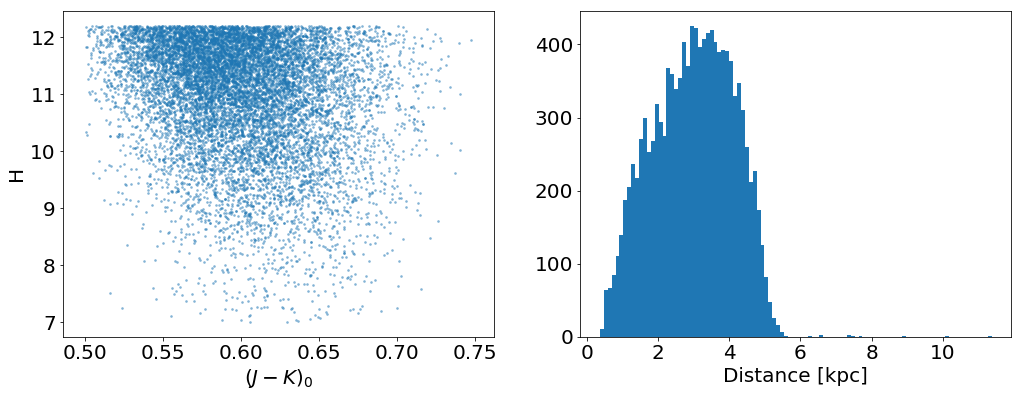

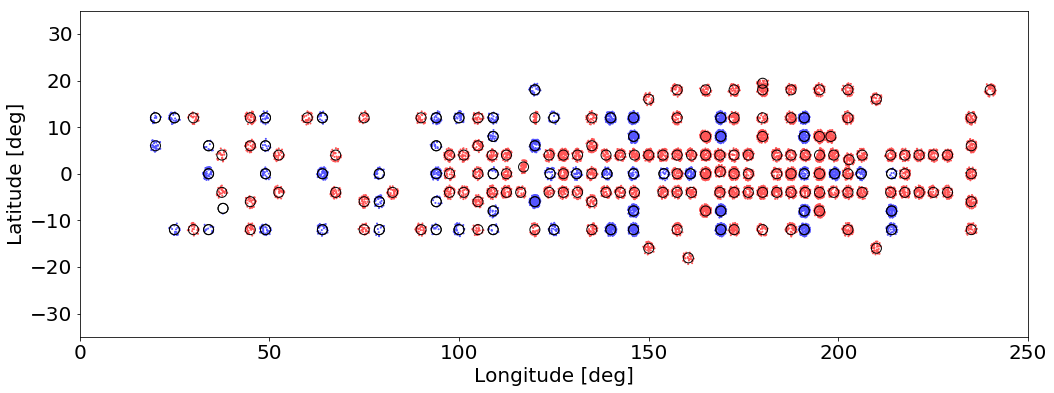

In [8]:
# =============================== Make the cuts ===========================================
# Finalize the mask and apply it
m_final = (m_short1 + (m_short2 & m_color)) & m_locids
tk = tt[m_final]

# How many stars are left?
print('We keep', np.sum(m_final), ' stars out of ', len(m_final))



# =============================== Make plots ===========================================
fig, axes = plt.subplots(1, 2, figsize=(17, 6))

# 1. The color mag plot
axes[0].scatter(tk['J']-tk['K']-1.5*tk['AK_TARG'], tk['H'], s=3, alpha=0.4)#, c=tk['SURVEY']=='apogee        ')
axes[0].set_xlabel('$(J-K)_0$')
axes[0].set_ylabel('H')

# 2. Distribution of Distance 
axes[1].hist(tk['RC_DIST'], 100)
axes[1].set_xlabel('Distance [kpc]')

# 3. Distribution in (l,b) 
plt.figure(figsize=(17,6))
# the data
plt.scatter(tk['GLON'], tk['GLAT'], s=1, c=tk['SURVEY']=='apogee        ', cmap='seismic', vmin=-1, vmax=2)
# the selection function
plt.scatter(sf['GLON'][sf['SEL_FRAC']>0], sf['GLAT'][sf['SEL_FRAC'] > 0], s=100, facecolor='None', edgecolor='k')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.ylim(-35,35)
plt.xlim(0, 250)

# D. Simplified wrong example: spatial density of the MW disk with RC stars

We'll assume that the data have no uncertainties in the following example (i.e. the selection based on color and magnitude depends only on the true colors and magnitudes, which are in this case identical to the observed ones. Else: margnialize over the uncertainties with a noise model).

## 1. Simplified model

Let's model the spatial density of the stars in the MW disk (relating it to the distribution of observables in the data set: l, b, D as position, H as apparent magnitude in H band

Our model for the stars in the MW disk is
$$
p_{MW}(X, Y, Z ~|~\theta).
$$

But we must model the dataset entirely (here assuming noise-free variables - otherwise to be convolved with a noise model)

$$
p_{dataset}(Obs) = p_{MW}(X, Y, Z ~|~\theta) . p_{MW}(rest~obs ~|~X, Y, Z) . P(\mathrm{select}~|~Obs)
$$

And now we can split it all with Bayes rule to make appear distributions that we can sort of model

$$
p(l, b, D, H ~|~ \theta) = \frac{1}{V_s(p)} p(X, Y, Z ~|~p) |Jac(X,Y,Z;l,b,D)| p(H ~|~ l, b, D, \theta) S(l, b, H(D, M_\mathrm{H})).
$$

where $V_s(p)$ is the normalizing constant of the pdf (known as the survey volume), $p(X, Y, Z ~|~\theta) $ is the 3D density of stars in the MW disk, which is our interest, and the rest is annoying things that come from the fact we have selected data. $|Jac(X,Y,X;l,b,D)|$ is the Jacobian to model cartesian coordinates distribution rather than l, b, D; $ p(H ~|~ l, b, D, \theta)$ is the distribution of apparent magnitudes at different positions: it is determined by the distribution of absolute magnitude of stars at that position $p(M_H)$, and by how much extinction there is on the line of sight. The term $ S(l, b, D, H)$ is the selection function: the probability that a star makes it to our dataset, given its observables. I have ommited the color $(J - K)_0$ from the notation, but it should be part of the equation as it is a selection criterion.

The survey volume is the integral of the model over the space described by the survey volume
$$
V_s(p) = \iiiint p(X, Y, Z ~|~\theta) |Jac(X,Y,X;l,b,D)| p(H ~|~ l, b, D, \theta) S(l, b, H) dD dl db dH
$$
making some assumptions (spatial density smooth accross single fields of 1.5 degrees), that becomes a sum over the fields
$$
V_s(p) = \sum_{fields} \int \int p(X, Y, Z ~|~\theta) D^2 p(H ~|~ l, b, D, \theta) S(l, b, H) \Omega_i dD dH
$$
where $\Omega_i = \iint cos(b) dl db$ is the area of an APOGEE plate. The selection functoin term can be split in chunks where it is constants (magnitude and color bin in fields) and the distribution of apparent magnitude can be modelled by that in absolute magnitude at given distance.

$$
V_s(p) = \sum_{fields, col, cohort} \int \int p(X, Y, Z ~|~p) D^2 p(M_H ~|~ l, b, D, p) S_i f_i(D, M_H) \Omega_i dD dM_H
$$


The inner integral over absolute magnitude
$$
\mathrm{effective} = \int p(M_H ~|~ l, b, D, p)  S_i f_i(D, M_H) dM_H
$$
is called the effective selection function. One can model the spatial distribution of absolute magnitude (and colors, remember) as a function of position in the Galactic disk. Why it is conditionned on position: metallicity probably influences color, and we have a metallicity gradient in the disk. Absolute magnitude changes with age, and there is a (weaker) age gradient in the disk. But in this example, we ignore all of this and assume we have a perfect standard candle, so $p(M_H ~|~ l, b, D, p) = \delta(M_H - H_\mathrm{RC})$.

More generally, should probably do more something like this:
$$
p(M_H ~|~ l, b, D, p) = p(M_H ~|~ \mathrm{some~isochrones, IMF ~(and~ remember~apogee~color~cuts}) )
$$



These equations are all put together in the module toy_model.py imported just below. Need Galpy package (Bovy+15) to get it to run.


In [9]:
selfunc = sf

### The toy model implemented: density, effective selection function

In [10]:
#import useful_functions as uf
import astropy.units as un
import astropy.coordinates as coord
import cone
import random

import rm_new as rm    # to remove

# import the toy_model.py module where the simple MW disk model equations above are implemented
# note: some functions use Galpy python package, and astropy!
from toy_model import *

First, we can import the effective selection function (here the distance dependent relative surface where stars are not hidden by dust)

In [11]:
# Get the effective selection function for a standard candle of mag H=-1.49
# by interpolating between two magnitudes (note: there are better ways, this is the lazy way)
eff = interpolate_effective_selfunc(selfunc['FRAC_DUST'], -1.49)

Then, we can write down the survey volume: product of the Milky Way model and the selection function, integrated over the observable space. That will be the normalization constant of the model.

In [12]:
def survey_volume(table, effective, pm):
    """
    Survey volume for the model (= normalization constant)
    
    Arguments
        table for the selection functoin
        effective selection function (the list of eff(D))
        pm model parameter object
        
    Returns
        the value of the survey volume integral (float)
        
    frankel 2018
    """
    I = 0
    
    # loop over the fields given in the table
    nth= 3 # take precomputed grid only every nth element
    for i in range(len(table)):
        dgrid = table['DIST'][i,:,0][::nth]
        l, b = table['GLON'][i], table['GLAT'][i]
 
        # convert to Galactocentric coordinates
        cs = coord.Galactic(l=l*un.degree, b=b*un.degree, distance=dgrid*un.kpc)
        ccs = cs.transform_to(coord.Galactocentric)
        xs, ys, zs = ccs.x.value, ccs.y.value, ccs.z.value
        R = np.sqrt(xs*xs + ys*ys)    # Galactocentric radius
        z = zs                        # height above the plane
        
        # solid angle in a field (integral over lb)
        area = (1 - np.cos(np.radians(table['RADIUS'][i])))*2*np.pi
        
        # compute the model and multiply by the selection function (model in toy_model.py)
        model = nu_Rz(R, z, pm)*dgrid**2*effective[i][::nth]*table['SEL_FRAC'][i]*area

        # integrate for each field over distance
        I += np.trapz(model, dgrid)
    return I

Finally, we can recast everything together to write a likelihood function as the product of model evaluated at each data point. 

In [13]:
def likelihood(pp, pm, R, z, table, effective):
    """
    Likelihood function in this example
    
    Arguments
    pp = model parameters array
    pm = model parameters object
    R = galactocentric radius of stars (array)
    z = height above the plane of stars (array)
    table = selection function table
    effective = eff(D) list obtained earlier
    
    Returns
    the likelihood that the data were drawn from the
    model parameters pp
    """
    # unpack        one can complexify / generalize this model - eg vertical structure
    pm.rd = pp#[0]
    #pm.hz=pp[1]
    
    # compute model aspects                              # drop selection function terms in numerator (not f(pm))
    numerator = nu_Rz(R, z, pm)                          # 3D density for the MW disk (in toy_model.py)
    denominator = survey_volume(table, effective, pm)    # normalization constant
    model = numerator / denominator
    
    # take the log likelihood and sum
    lik = np.log(model)
    lik = np.sum(lik)
    return lik

# useful to define the minus likelihood to minimize later
def minus_likelihood(pp, pm, R, z, table, effective):
    # print model parameters and return
    print(pp)
    return - likelihood(pp, pm, R, z, table, effective)

In [14]:
n = 1000

# Mask the selection function (to clarify)
mask_short = ((selfunc['COHORT'] == 's') + (selfunc['SURVEY'] =='apogee')) & (selfunc['H_MIN']<8) # select short cohort
mask_blue = (selfunc['JK_MIN'] < 0.6) # select blue bin (we are modelling red clump stars J-K0 < 0.8)
mfunc = mask_short & mask_blue

# mask the selection function and unpack
selfunc1 = selfunc[mfunc]
l_p = selfunc1['GLON'].data
b_p = selfunc1['GLAT'].data
D_linear = selfunc1['DIST'][:,:,0].data

# Fraction of stars not extincted by dust for a standard candle of absolute magnitude -1.49
frac_dust = interpolate_effective_selfunc(selfunc['FRAC_DUST'], -1.49)
radius_plate = selfunc1['RADIUS'].data
area = (1 - np.cos(np.radians(selfunc1['RADIUS'])))*2*np.pi
selfrac = selfunc1['SEL_FRAC'].data
locids=selfunc1['LOCATION_ID'].data

# model parameters
pm = params(rd = 3.3, hz=0.3)

# sample points
R_arr, z_arr, l_arr, b_arr, D_arr, locs = draw_several_pointings_expo(n, l_p, b_p, D_linear, frac_dust,
                                 pm, radius_plate, area, selfrac, locids)

In [15]:
# TConvert to Galactocentric coordinates
cs = coord.Galactic(l=tk['GLON'].data*un.degree, b=tk['GLAT'].data*un.degree, distance=tk['RC_DIST']*un.kpc)
ccs = cs.transform_to(coord.Galactocentric)
xs, ys, zs = ccs.x.value, ccs.y.value, ccs.z.value
R = np.sqrt(xs*xs + ys*ys)
z = zs

#### Galactocentric radius distribution: model VS data

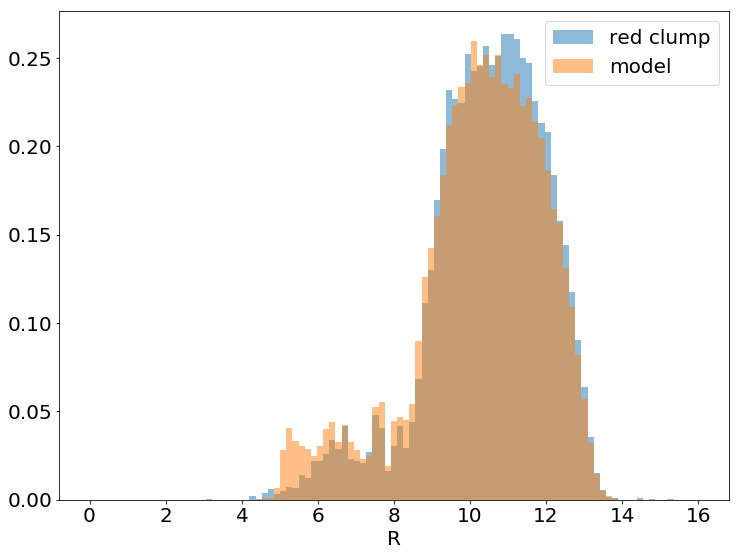

In [16]:
#plt.figure(figsize=(10,9))
rr = np.linspace(0,16,100)
plt.hist(R, rr, alpha=0.5, density=1, label='red clump')
plt.hist(R_arr, rr, alpha=0.5, density=1, label='model')
plt.xlabel('R')
plt.legend()
plt.show()

#### Residuals in fields

We can plot the residuals in each field. We see that the model tends to overestimate the number of stars in the midplane fields in the inner disk (see a lot of yellow), this can be a combined effect from high extinction, imperfect dust map, possible crowding in 2MASS or that the model is imperfect (With a full Milky Way disk model $p([Fe/H], \tau, X, Y, Z, V_R, V_\phi)$ I could obtain much smaller residuals and the inner disk is much better described).

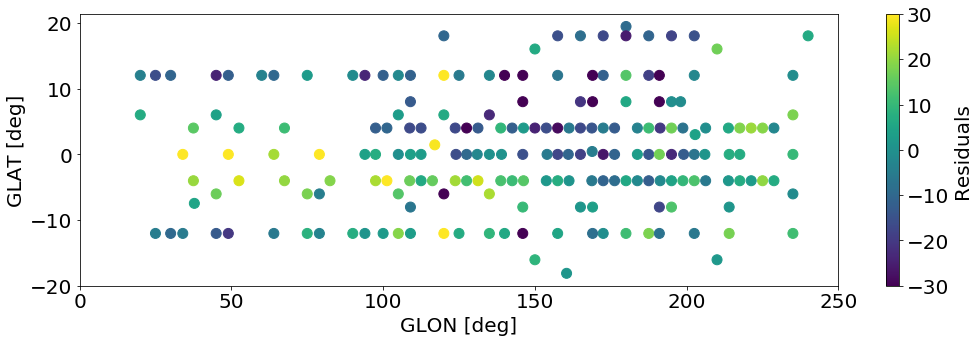

In [17]:
N_rc = len(tk)
N_mock = len(l_arr)
locids = selfunc1['LOCATION_ID']
residual = np.zeros(len(locids))
for i in range(len(locids)):
    m_mock = locs == locids[i]
    m_rc = tk['LOCATION_ID'] == locids[i]
    residual[i] = np.sum(m_mock)*N_rc/N_mock - np.sum(m_rc)

plt.figure(figsize=(17,5))    
plt.scatter(selfunc1['GLON'], selfunc1['GLAT'], c=residual, vmin=-30,vmax=30, s=100)
plt.xlim(0,250)
plt.xlabel('GLON [deg]')
plt.ylabel('GLAT [deg]')
plt.colorbar(label='Residuals')
plt.show()

### Fitting the model to the dataset: Mesuring the scale-length of the ~2 Gyr old Milky Way disk

Note 1: this is very slow because the code is not optimized and here just as an example.


Note 2: as the MW disk is thought to have grown from inside out, and as red clump stars are fairly young, the scale-length we measure here is NOT the scale length of the Milky Way disk, but that of the younger population (unless we correct for it, which I don't do here). If the Milky Way disk grew from inside-out, as we think it did, then it would not be surprising that this scale length estimate has a higher value than the litterature values looking at all stars.

In [18]:
from scipy.optimize import minimize

pm = params(rd=3, hz=0.3)

pp = np.array([3])#, 0.3])

print('Printing Rd')
best = minimize(minus_likelihood, pp, args=(pm, R, z, selfunc, eff), method='Nelder-Mead')
print('\n\nThe best fit scale length is')
print(best.x[0], ' kpc')

Printing Rd
[3.]
[3.15]
[3.3]
[3.45]
[3.45]
[3.375]
[3.225]
[3.2625]
[3.3375]
[3.28125]
[3.31875]
[3.290625]
[3.28125]
[3.2953125]
[3.3]
[3.29296875]
[3.29765625]
[3.29414063]
[3.29648438]
[3.29472656]
[3.29414063]
[3.29501953]
[3.2953125]
[3.29487305]
[3.29472656]
[3.29494629]


The best fit scale length is
3.2948730468750007  kpc


## D. More reading material

The following references might be of interest, (and are the ground base of the selection function presented here):

- for the **overall method** linking the observed dataset to the MW through the selection function: [Rix & Bovy (2013)](https://arxiv.org/pdf/1301.3168.pdf)
- for the technical descriptions of the **target selection**: [Zasowski+13](https://arxiv.org/pdf/1308.0351.pdf) for apogee1, and [Zasowski+17](https://arxiv.org/pdf/1708.00155.pdf) for apogee2
- for the method to compute **selection fractions** in SEGUE example: [Bovy+12](https://arxiv.org/pdf/1111.1724.pdf), [Bovy+14](https://arxiv.org/pdf/1405.1032.pdf), [Bovy+16b](https://arxiv.org/pdf/1509.05796.pdf)
- for the 'effective selection function' (i.e. **including extinction(D)**): [Bovy+16a](https://arxiv.org/pdf/1509.06751.pdf)
- for putting everything together with a **density model and get neat scientific results**: all of the Bovy above and [Mackereth+17](https://arxiv.org/pdf/1706.00018.pdf) and [Mackereth+19](https://arxiv.org/pdf/1901.04502.pdf)
- for the **3D dust maps**, see [Green+18](https://ui.adsabs.harvard.edu/abs/2018MNRAS.478..651G/abstract) and [Green+19](https://ui.adsabs.harvard.edu/abs/2019arXiv190502734G/abstract), with a beautiful website [here](http://argonaut.skymaps.info/).